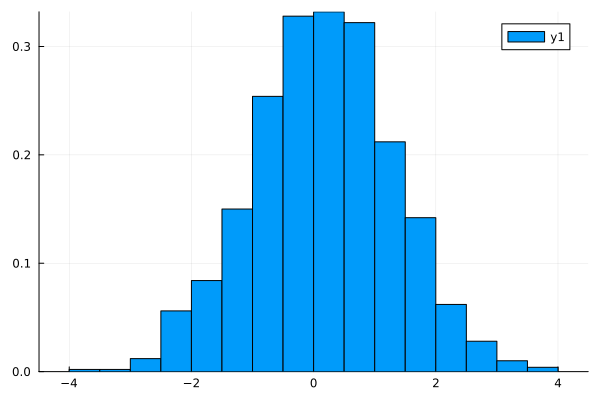

In [3]:
using Distributions, ExponentialFamily, Plots, StableRNGs

# The model will infer the hidden parameters from data
hidden_mean         = 0.2
hidden_precision    = 0.8
hidden_distribution = NormalMeanPrecision(hidden_mean, hidden_precision)

number_of_datapoints = 1000
data = rand(StableRNG(42), hidden_distribution, number_of_datapoints)

histogram(data; normalize = :pdf)

In [4]:
using RxInfer

@model function non_conjugate_model(y)
   m ~ Beta(1, 1)
   p ~ Beta(1, 1)
   y .~ Normal(mean = m, precision = p)
end

In [7]:
result = infer(
    model = non_conjugate_model(),
    data  = (y = data, )
)

┌ Error: We encountered an error during inference, here are some helpful resources to get you back on track:
│ 
│ 1. Check our Sharp bits documentation which covers common issues:
│ https://docs.rxinfer.com/stable/manuals/sharpbits/overview/
│ 2. Browse our existing discussions - your question may already be answered:
│ https://github.com/ReactiveBayes/RxInfer.jl/discussions
│ 3. Take inspiration from our set of examples:
│ https://examples.rxinfer.com/
│ 
│ Still stuck? We'd love to help! You can:
│ - Start a discussion for questions and help. Feedback and questions from new users is also welcome! If you are stuck, please reach out and we will solve it together.
│ https://github.com/ReactiveBayes/RxInfer.jl/discussions
│ - Report a bug or request a feature:
│ https://github.com/ReactiveBayes/RxInfer.jl/issues
│ - (Optional) Share your session data with `RxInfer.share_session_data()` to help us better understand the issue
│ https://docs.rxinfer.com/stable/manuals/telemetry/
│ 
│ Note t

ErrorException: Variables [ m, p ] have not been updated after an update event. 
Therefore, make sure to initialize all required marginals and messages. See `initialization` keyword argument for the inference function. 
See the official documentation for detailed information regarding the initialization.
